In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss(reduction="mean") # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1) * 0.9
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:19,  5.96it/s]                                                                                                                                                             


Epoch 1 of 100
Generator loss: 1.66064013, Discriminator loss: 0.89714310


118it [17:24,  8.85s/it]                                                                                                                                                             


Epoch 2 of 100
Generator loss: 1.73282592, Discriminator loss: 1.19788326


118it [02:37,  1.34s/it]                                                                                                                                                             


Epoch 3 of 100
Generator loss: 6.59167299, Discriminator loss: 0.73684553


118it [00:19,  6.14it/s]                                                                                                                                                             


Epoch 4 of 100
Generator loss: 7.64912893, Discriminator loss: 0.39883282


118it [00:19,  6.18it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


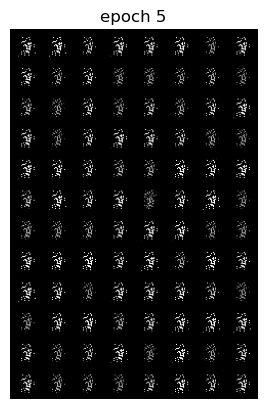

Epoch 5 of 100
Generator loss: 8.49368025, Discriminator loss: 0.57188641


118it [00:19,  6.18it/s]                                                                                                                                                             


Epoch 6 of 100
Generator loss: 9.26255342, Discriminator loss: 0.52670239


118it [00:19,  6.20it/s]                                                                                                                                                             


Epoch 7 of 100
Generator loss: 4.60866848, Discriminator loss: 0.74897784


118it [00:19,  6.15it/s]                                                                                                                                                             


Epoch 8 of 100
Generator loss: 3.65942549, Discriminator loss: 0.75954943


118it [00:19,  6.05it/s]                                                                                                                                                             


Epoch 9 of 100
Generator loss: 3.34147474, Discriminator loss: 0.96440441


118it [00:20,  5.77it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


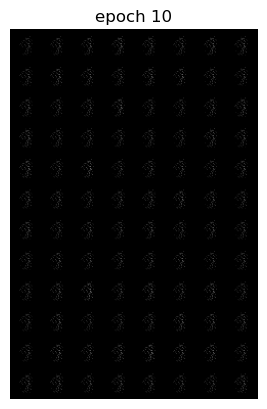

Epoch 10 of 100
Generator loss: 3.28000651, Discriminator loss: 0.78417506


118it [00:20,  5.79it/s]                                                                                                                                                             


Epoch 11 of 100
Generator loss: 2.70573399, Discriminator loss: 0.92079454


118it [00:19,  5.91it/s]                                                                                                                                                             


Epoch 12 of 100
Generator loss: 2.67852558, Discriminator loss: 0.74410844


118it [00:19,  5.95it/s]                                                                                                                                                             


Epoch 13 of 100
Generator loss: 2.10900154, Discriminator loss: 0.95746104


118it [00:20,  5.66it/s]                                                                                                                                                             


Epoch 14 of 100
Generator loss: 3.01205887, Discriminator loss: 0.80002763


118it [00:18,  6.23it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


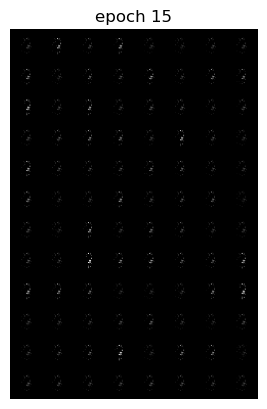

Epoch 15 of 100
Generator loss: 2.84408159, Discriminator loss: 0.74263353


118it [00:19,  6.07it/s]                                                                                                                                                             


Epoch 16 of 100
Generator loss: 3.24833048, Discriminator loss: 0.66223491


118it [00:19,  6.20it/s]                                                                                                                                                             


Epoch 17 of 100
Generator loss: 3.86466864, Discriminator loss: 0.63351295


118it [00:19,  6.15it/s]                                                                                                                                                             


Epoch 18 of 100
Generator loss: 3.95841727, Discriminator loss: 0.52553512


118it [00:19,  6.07it/s]                                                                                                                                                             


Epoch 19 of 100
Generator loss: 4.21258446, Discriminator loss: 0.56382742


118it [00:19,  6.19it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


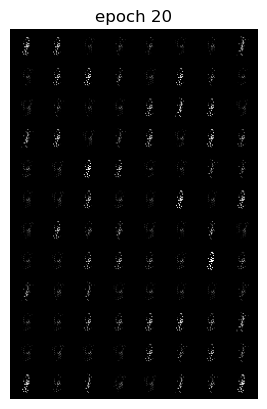

Epoch 20 of 100
Generator loss: 4.35446515, Discriminator loss: 0.65283645


118it [00:19,  6.16it/s]                                                                                                                                                             


Epoch 21 of 100
Generator loss: 4.61424343, Discriminator loss: 0.60296291


118it [00:19,  6.11it/s]                                                                                                                                                             


Epoch 22 of 100
Generator loss: 4.40720066, Discriminator loss: 0.59283280


118it [00:19,  6.04it/s]                                                                                                                                                             


Epoch 23 of 100
Generator loss: 4.10707352, Discriminator loss: 0.63222617


118it [00:19,  6.08it/s]                                                                                                                                                             


Epoch 24 of 100
Generator loss: 4.37023291, Discriminator loss: 0.61489029


118it [00:19,  5.99it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


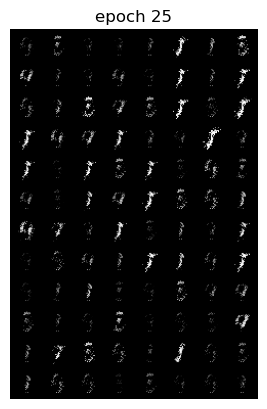

Epoch 25 of 100
Generator loss: 4.35352470, Discriminator loss: 0.64389463


118it [00:19,  6.01it/s]                                                                                                                                                             


Epoch 26 of 100
Generator loss: 3.77547580, Discriminator loss: 0.64704707


118it [00:19,  6.02it/s]                                                                                                                                                             


Epoch 27 of 100
Generator loss: 4.33696569, Discriminator loss: 0.61241839


118it [00:19,  6.04it/s]                                                                                                                                                             


Epoch 28 of 100
Generator loss: 3.77710058, Discriminator loss: 0.71646642


118it [00:19,  5.94it/s]                                                                                                                                                             


Epoch 29 of 100
Generator loss: 3.97501950, Discriminator loss: 0.62694801


118it [00:19,  5.94it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


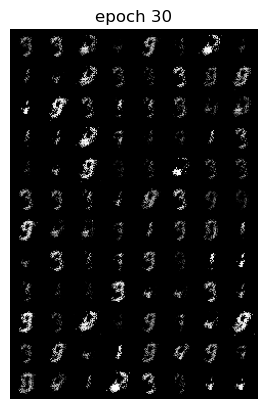

Epoch 30 of 100
Generator loss: 3.78891640, Discriminator loss: 0.66506850


118it [00:19,  6.02it/s]                                                                                                                                                             


Epoch 31 of 100
Generator loss: 3.61186633, Discriminator loss: 0.70897022


118it [00:19,  6.13it/s]                                                                                                                                                             


Epoch 32 of 100
Generator loss: 3.57933354, Discriminator loss: 0.69371084


118it [00:19,  6.13it/s]                                                                                                                                                             


Epoch 33 of 100
Generator loss: 3.61517309, Discriminator loss: 0.70253515


118it [00:19,  6.12it/s]                                                                                                                                                             


Epoch 34 of 100
Generator loss: 3.42165077, Discriminator loss: 0.61991859


118it [00:19,  6.07it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


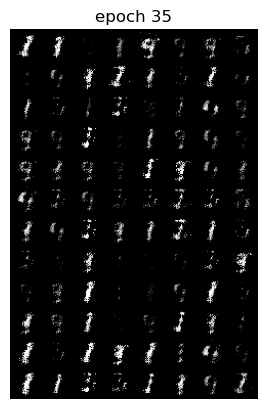

Epoch 35 of 100
Generator loss: 3.93592340, Discriminator loss: 0.58520890


118it [00:20,  5.79it/s]                                                                                                                                                             


Epoch 36 of 100
Generator loss: 3.93342309, Discriminator loss: 0.63530046


118it [00:19,  6.08it/s]                                                                                                                                                             


Epoch 37 of 100
Generator loss: 3.66505267, Discriminator loss: 0.67098291


118it [00:19,  6.04it/s]                                                                                                                                                             


Epoch 38 of 100
Generator loss: 3.59459146, Discriminator loss: 0.66210032


118it [00:19,  6.05it/s]                                                                                                                                                             


Epoch 39 of 100
Generator loss: 3.82085702, Discriminator loss: 0.66231946


118it [00:19,  5.99it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


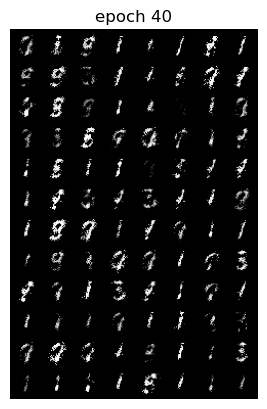

Epoch 40 of 100
Generator loss: 3.58428140, Discriminator loss: 0.67376455


118it [00:19,  5.92it/s]                                                                                                                                                             


Epoch 41 of 100
Generator loss: 3.55111827, Discriminator loss: 0.66649688


118it [00:19,  6.18it/s]                                                                                                                                                             


Epoch 42 of 100
Generator loss: 3.42819014, Discriminator loss: 0.68498638


118it [00:19,  6.10it/s]                                                                                                                                                             


Epoch 43 of 100
Generator loss: 3.52490338, Discriminator loss: 0.66421661


118it [02:35,  1.32s/it]                                                                                                                                                             


Epoch 44 of 100
Generator loss: 3.81107313, Discriminator loss: 0.68581049


118it [18:15,  9.28s/it]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


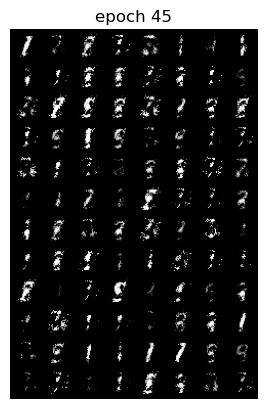

Epoch 45 of 100
Generator loss: 3.33390342, Discriminator loss: 0.71820072


118it [05:47,  2.94s/it]                                                                                                                                                             


Epoch 46 of 100
Generator loss: 3.32152342, Discriminator loss: 0.66628209


118it [16:46,  8.53s/it]                                                                                                                                                             


Epoch 47 of 100
Generator loss: 3.13399689, Discriminator loss: 0.69340487


118it [1:04:51, 32.98s/it]                                                                                                                                                           


Epoch 48 of 100
Generator loss: 3.29700756, Discriminator loss: 0.69046476


118it [24:15, 12.33s/it]                                                                                                                                                             


Epoch 49 of 100
Generator loss: 3.29021100, Discriminator loss: 0.74025985


118it [22:07, 11.25s/it]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


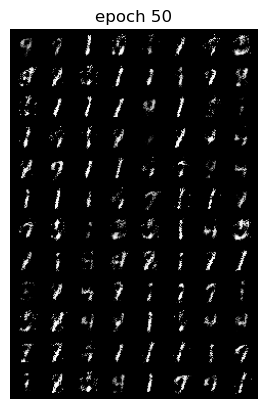

Epoch 50 of 100
Generator loss: 3.33047783, Discriminator loss: 0.68396367


118it [00:20,  5.79it/s]                                                                                                                                                             


Epoch 51 of 100
Generator loss: 3.03149760, Discriminator loss: 0.72068353


118it [00:19,  6.03it/s]                                                                                                                                                             


Epoch 52 of 100
Generator loss: 2.97086956, Discriminator loss: 0.74121959


118it [00:19,  6.13it/s]                                                                                                                                                             


Epoch 53 of 100
Generator loss: 2.84461789, Discriminator loss: 0.80156399


118it [00:19,  6.13it/s]                                                                                                                                                             


Epoch 54 of 100
Generator loss: 3.08962848, Discriminator loss: 0.73406844


118it [00:20,  5.86it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


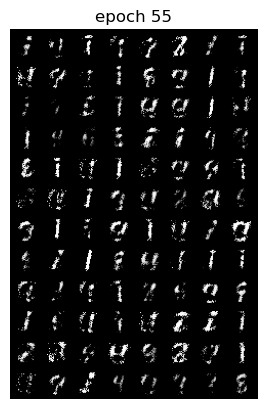

Epoch 55 of 100
Generator loss: 2.66793539, Discriminator loss: 0.81481979


118it [00:19,  6.03it/s]                                                                                                                                                             


Epoch 56 of 100
Generator loss: 2.75037203, Discriminator loss: 0.79258951


118it [00:19,  6.13it/s]                                                                                                                                                             


Epoch 57 of 100
Generator loss: 2.89470501, Discriminator loss: 0.76037067


118it [00:19,  6.10it/s]                                                                                                                                                             


Epoch 58 of 100
Generator loss: 2.85205661, Discriminator loss: 0.77475627


118it [00:19,  5.96it/s]                                                                                                                                                             


Epoch 59 of 100
Generator loss: 2.82101080, Discriminator loss: 0.82378551


118it [00:20,  5.82it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


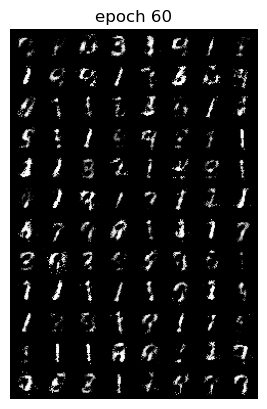

Epoch 60 of 100
Generator loss: 2.61135608, Discriminator loss: 0.78588578


118it [00:19,  5.98it/s]                                                                                                                                                             


Epoch 61 of 100
Generator loss: 2.55646380, Discriminator loss: 0.78973816


118it [00:19,  6.11it/s]                                                                                                                                                             


Epoch 62 of 100
Generator loss: 2.66869451, Discriminator loss: 0.73957469


118it [00:19,  6.06it/s]                                                                                                                                                             


Epoch 63 of 100
Generator loss: 2.65931238, Discriminator loss: 0.76345164


118it [00:19,  6.12it/s]                                                                                                                                                             


Epoch 64 of 100
Generator loss: 2.51456332, Discriminator loss: 0.83824558


118it [00:19,  6.11it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


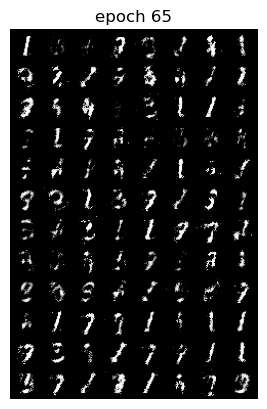

Epoch 65 of 100
Generator loss: 2.54585494, Discriminator loss: 0.84829822


118it [00:19,  6.13it/s]                                                                                                                                                             


Epoch 66 of 100
Generator loss: 2.56271835, Discriminator loss: 0.80399600


118it [00:19,  6.12it/s]                                                                                                                                                             


Epoch 67 of 100
Generator loss: 2.59328889, Discriminator loss: 0.82075191


118it [00:19,  6.11it/s]                                                                                                                                                             


Epoch 68 of 100
Generator loss: 2.39488208, Discriminator loss: 0.85950400


118it [00:19,  6.05it/s]                                                                                                                                                             


Epoch 69 of 100
Generator loss: 2.38554521, Discriminator loss: 0.83576620


118it [00:19,  6.06it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


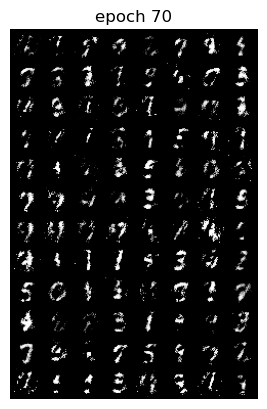

Epoch 70 of 100
Generator loss: 2.41428578, Discriminator loss: 0.85413287


118it [00:19,  6.10it/s]                                                                                                                                                             


Epoch 71 of 100
Generator loss: 2.40109003, Discriminator loss: 0.85144303


118it [00:19,  6.11it/s]                                                                                                                                                             


Epoch 72 of 100
Generator loss: 2.42097675, Discriminator loss: 0.84808453


118it [00:19,  6.11it/s]                                                                                                                                                             


Epoch 73 of 100
Generator loss: 2.52741346, Discriminator loss: 0.86504437


118it [00:19,  6.13it/s]                                                                                                                                                             


Epoch 74 of 100
Generator loss: 2.33261339, Discriminator loss: 0.83464729


118it [00:19,  6.11it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


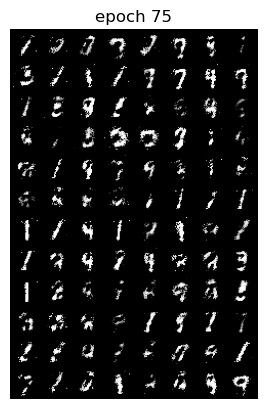

Epoch 75 of 100
Generator loss: 2.46354338, Discriminator loss: 0.80514107


118it [00:19,  6.08it/s]                                                                                                                                                             


Epoch 76 of 100
Generator loss: 2.51547746, Discriminator loss: 0.83692998


118it [00:20,  5.78it/s]                                                                                                                                                             


Epoch 77 of 100
Generator loss: 2.45282143, Discriminator loss: 0.87339552


118it [00:20,  5.74it/s]                                                                                                                                                             


Epoch 78 of 100
Generator loss: 2.41947811, Discriminator loss: 0.85700195


118it [00:19,  6.03it/s]                                                                                                                                                             


Epoch 79 of 100
Generator loss: 2.29590972, Discriminator loss: 0.86517786


118it [00:19,  6.11it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


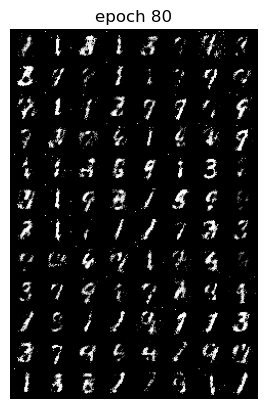

Epoch 80 of 100
Generator loss: 2.40190916, Discriminator loss: 0.86575048


118it [00:19,  6.11it/s]                                                                                                                                                             


Epoch 81 of 100
Generator loss: 2.35625471, Discriminator loss: 0.85251565


118it [00:19,  6.10it/s]                                                                                                                                                             


Epoch 82 of 100
Generator loss: 2.26625400, Discriminator loss: 0.87987976


118it [00:19,  6.13it/s]                                                                                                                                                             


Epoch 83 of 100
Generator loss: 2.22644848, Discriminator loss: 0.88970807


118it [00:19,  6.09it/s]                                                                                                                                                             


Epoch 84 of 100
Generator loss: 2.26568208, Discriminator loss: 0.87336243


118it [00:19,  6.09it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


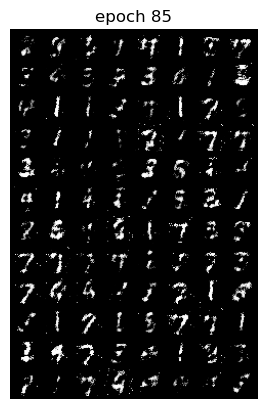

Epoch 85 of 100
Generator loss: 2.29921027, Discriminator loss: 0.86798805


118it [00:19,  6.12it/s]                                                                                                                                                             


Epoch 86 of 100
Generator loss: 2.25535647, Discriminator loss: 0.86938805


118it [00:19,  6.12it/s]                                                                                                                                                             


Epoch 87 of 100
Generator loss: 2.12454813, Discriminator loss: 0.91183107


118it [00:19,  6.08it/s]                                                                                                                                                             


Epoch 88 of 100
Generator loss: 2.22511135, Discriminator loss: 0.88816874


118it [00:19,  5.98it/s]                                                                                                                                                             


Epoch 89 of 100
Generator loss: 2.13859774, Discriminator loss: 0.92217295


118it [00:20,  5.84it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


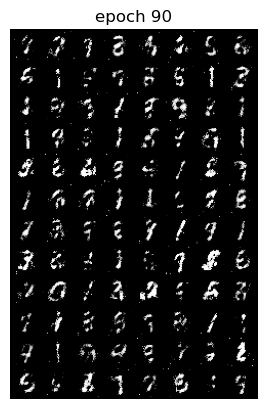

Epoch 90 of 100
Generator loss: 2.13977871, Discriminator loss: 0.92851698


118it [00:20,  5.85it/s]                                                                                                                                                             


Epoch 91 of 100
Generator loss: 2.09559368, Discriminator loss: 0.92334983


118it [00:21,  5.58it/s]                                                                                                                                                             


Epoch 92 of 100
Generator loss: 2.04629531, Discriminator loss: 0.93187840


118it [00:20,  5.81it/s]                                                                                                                                                             


Epoch 93 of 100
Generator loss: 2.02029315, Discriminator loss: 0.93013630


118it [00:19,  6.05it/s]                                                                                                                                                             


Epoch 94 of 100
Generator loss: 2.06217184, Discriminator loss: 0.91639641


118it [00:19,  5.93it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


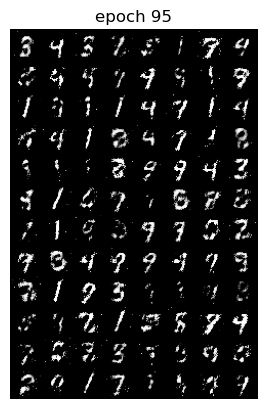

Epoch 95 of 100
Generator loss: 2.03659651, Discriminator loss: 0.92444470


118it [00:20,  5.87it/s]                                                                                                                                                             


Epoch 96 of 100
Generator loss: 2.18765701, Discriminator loss: 0.89991921


118it [00:20,  5.89it/s]                                                                                                                                                             


Epoch 97 of 100
Generator loss: 2.18282688, Discriminator loss: 0.91574580


118it [00:20,  5.84it/s]                                                                                                                                                             


Epoch 98 of 100
Generator loss: 2.04248568, Discriminator loss: 0.93523138


118it [00:20,  5.89it/s]                                                                                                                                                             


Epoch 99 of 100
Generator loss: 2.09388124, Discriminator loss: 0.90382049


118it [00:20,  5.80it/s]                                                                                                                                                             
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


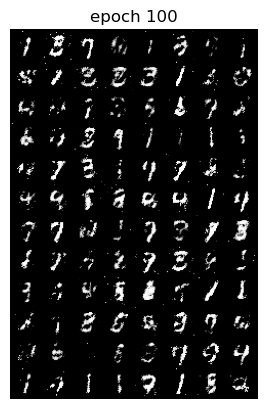

Epoch 100 of 100
Generator loss: 2.12146796, Discriminator loss: 0.89877446


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    return criterion(output, true_label)
    
def discriminator_loss(output, true_label):
    return criterion(output, true_label)
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        X, _ = data
        X = X.to(device)
        
        batch_size = X.size(0)

        y_real = label_real(batch_size)
        y_fake = label_fake(batch_size)
        
        discriminator.zero_grad()
        y_hat_real = discriminator(X)
        batch_loss_real = discriminator_loss(y_hat_real, y_real)
        
        noise = create_noise(batch_size, nz)
        X_fake = generator(noise)
        y_hat_fake = discriminator(X_fake.detach())
        batch_loss_fake = discriminator_loss(y_hat_fake, y_fake)
        
        batch_loss_d = batch_loss_real + batch_loss_fake
        batch_loss_d.backward()
        
        optim_d.step()
        
        
        # train generator
        
        generator.zero_grad()
        output = discriminator(X_fake)
        batch_loss_g = generator_loss(output, y_real)
        batch_loss_g.backward()
        optim_g.step()

            
        loss_d += batch_loss_d.detach().numpy()
        loss_g += batch_loss_g.detach().numpy()
    
        ######################################    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

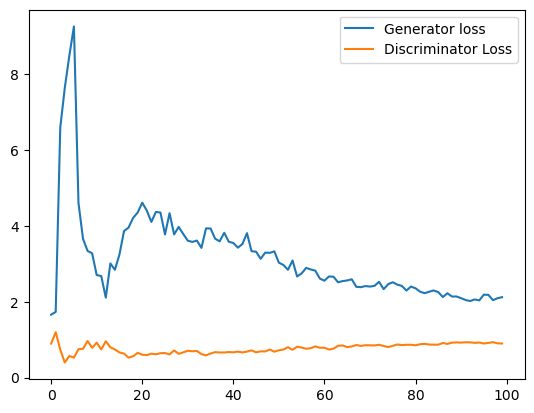

In [17]:
# plot and save the generator and discriminator loss

plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')